In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## ROC görbe, AUC érték és nagyházi

In [4]:
adf=pd.read_csv("../data/nagyhazi/train_log.csv")
adf.head()

,ID,Attr0,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,...,Attr203,Attr204,Attr205,Attr206,Attr207,Attr208,Attr209,Attr210,Attr211,AffScore
0,31836,NaN,NaN,NaN,NaN,NaN,539.0,14.0,NaN,NaN,...,z4pH,05j67Xw,LM8l689qOp,NaN,ELof,WqMG,RAYp,R4y5gQQWY8OodqDV,mj86,-1
1,34332,NaN,NaN,NaN,NaN,NaN,252.0,0.0,NaN,NaN,...,oslk,xYH_Q4n,NaN,NaN,NaN,uWr3,RAYp,F2FyR07IdsN7I,NaN,-1
2,18774,NaN,NaN,NaN,NaN,NaN,21.0,0.0,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,-1
3,27032,NaN,NaN,NaN,NaN,NaN,791.0,14.0,NaN,NaN,...,d0EEeJi,qDlXf37,M_8D,NaN,NaN,Qu4f,nIGXDli,F2FyR07IdsN7I,mj86,-1
4,28835,NaN,NaN,NaN,NaN,NaN,1827.0,7.0,NaN,NaN,...,d0EEeJi,7rsSD8A,LM8l689qOp,NaN,NaN,FSa2,nIGXDli,F2FyR07IdsN7I,NaN,-1


In [5]:
# Affscore az egy adatbányászati célváltozó ami nem vesz részt az elemzésben, ez nincs is benne a teszt adatszettben
bdf=pd.read_csv("../data/nagyhazi/test_log.csv")
bdf.head()

,ID,Attr0,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,...,Attr202,Attr203,Attr204,Attr205,Attr206,Attr207,Attr208,Attr209,Attr210,Attr211
0,18860,NaN,NaN,NaN,NaN,NaN,238.0,0.0,NaN,NaN,...,t5EoLzk,oslk,ag5iNPX,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN
1,14595,NaN,NaN,NaN,NaN,NaN,2177.0,0.0,NaN,NaN,...,vjPo2f2,oslk,wzps5nE,jySVZNlOJy,NaN,NaN,me1d,RAYp,55YFVY9,am7c
2,16065,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,Tvpip6Z,zCkv,hHJsvbM,LM8l689qOp,NaN,NaN,5Acm,6fzt,F2FcTt7IdMT_v,NaN
3,38582,NaN,NaN,NaN,NaN,NaN,5019.0,7.0,NaN,NaN,...,UF16siJ,zCkv,APgdzOv,LM8l689qOp,NaN,ELof,wX53,6fzt,Zy3gnGM,mj86
4,39690,NaN,NaN,NaN,NaN,NaN,2212.0,7.0,NaN,NaN,...,4UxGlow,zCkv,catzS2D,LM8l689qOp,NaN,kG3k,FSa2,ZI9m,ib5G6X1eUxUn6,am7c


In [7]:
tdf=pd.read_csv("../data/nagyhazi/train_target.csv")
tdf.head()
#melyik id jű szereplő milyen targettel rendelkezik

,ID,Target
0,31836,0
1,34332,0
2,18774,0
3,27032,0
4,28835,0


In [8]:
adf['Train_Test']="Train"
bdf['Train_Test']="Test"
adf=adf.merge(tdf,on='ID', how='left')

In [9]:
alldf =pd.concat([adf,bdf])
alldf

,AffScore,Attr0,Attr1,Attr10,Attr100,Attr101,Attr102,Attr103,Attr104,Attr105,...,Attr93,Attr94,Attr95,Attr96,Attr97,Attr98,Attr99,ID,Target,Train_Test
0,-1.0,NaN,NaN,NaN,0.0,271170.80,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16.0,NaN,NaN,31836,0.0,Train
1,-1.0,NaN,NaN,NaN,8.0,-51363.20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,NaN,NaN,34332,0.0,Train
2,-1.0,NaN,NaN,NaN,8.0,38766.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16.0,NaN,NaN,18774,0.0,Train
3,-1.0,NaN,NaN,NaN,32.0,140741.60,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,32.0,NaN,NaN,27032,0.0,Train
4,-1.0,NaN,NaN,NaN,40.0,-191319.60,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,72.0,NaN,NaN,28835,0.0,Train
5,-1.0,NaN,NaN,NaN,0.0,-168487.20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,NaN,NaN,12949,0.0,Train
6,-1.0,NaN,NaN,NaN,40.0,-118585.60,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48.0,NaN,NaN,40662,1.0,Train
7,-1.0,NaN,NaN,NaN,256.0,40276.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,144.0,NaN,NaN,3617,0.0,Train
8,-1.0,NaN,NaN,NaN,64.0,792828.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.0,NaN,NaN,36428,0.0,Train
9,-1.0,NaN,NaN,NaN,8.0,48160.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16.0,NaN,NaN,1560,0.0,Train


## első modell építés
bemenő változók

In [10]:
list(alldf.columns) #sikerült abc ben sorolnia a pythonnak, ami subotpimal itt

['AffScore',
 'Attr0',
 'Attr1',
 'Attr10',
 'Attr100',
 'Attr101',
 'Attr102',
 'Attr103',
 'Attr104',
 'Attr105',
 'Attr106',
 'Attr107',
 'Attr108',
 'Attr109',
 'Attr11',
 'Attr110',
 'Attr111',
 'Attr112',
 'Attr113',
 'Attr114',
 'Attr115',
 'Attr116',
 'Attr117',
 'Attr118',
 'Attr119',
 'Attr12',
 'Attr120',
 'Attr121',
 'Attr122',
 'Attr123',
 'Attr124',
 'Attr125',
 'Attr126',
 'Attr127',
 'Attr128',
 'Attr129',
 'Attr13',
 'Attr130',
 'Attr131',
 'Attr132',
 'Attr133',
 'Attr134',
 'Attr135',
 'Attr136',
 'Attr137',
 'Attr138',
 'Attr139',
 'Attr14',
 'Attr140',
 'Attr141',
 'Attr142',
 'Attr143',
 'Attr144',
 'Attr145',
 'Attr146',
 'Attr147',
 'Attr148',
 'Attr149',
 'Attr15',
 'Attr150',
 'Attr151',
 'Attr152',
 'Attr153',
 'Attr154',
 'Attr155',
 'Attr156',
 'Attr157',
 'Attr158',
 'Attr159',
 'Attr16',
 'Attr160',
 'Attr161',
 'Attr162',
 'Attr163',
 'Attr164',
 'Attr165',
 'Attr166',
 'Attr167',
 'Attr168',
 'Attr169',
 'Attr17',
 'Attr170',
 'Attr171',
 'Attr172',
 'A

In [14]:
bemeno_valtozok=[]
for i in range(0,100):
    bemeno_valtozok.append("Attr"+str(i))

# bemeno_valtozok= [ "Attr"+str(i) for i in range (0,100)]
    
bemeno_valtozok[:5]

['Attr0', 'Attr1', 'Attr2', 'Attr3', 'Attr4']

In [19]:
celvaltozo='Target'

alldf[celvaltozo].describe()
#7 % reagált amegkeresésre, ez egy upselling változó nem churn, elírták
#ezt havi bontásban szokták számolni, telcomnál ez manapság 0.5-1 % just for perspective

count    30000.000000
mean         0.074267
std          0.262209
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Target, dtype: float64

In [23]:
for valtozo in bemeno_valtozok:
    alldf[valtozo]=alldf[valtozo].fillna(alldf[valtozo].mean())

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model=RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)

In [26]:
ismert_df=alldf[alldf['Train_Test']=="Train"]

In [27]:
train_df=ismert_df.iloc[:20000, :].copy()
test_df=ismert_df.iloc[20000:,:].copy()

In [28]:
train_df[bemeno_valtozok].head()
#még túl sok az NaN


,Attr0,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr90,Attr91,Attr92,Attr93,Attr94,Attr95,Attr96,Attr97,Attr98,Attr99
0,11.487179,0.004029,425.298387,0.125396,238793.32885,539.0,14.0,48.145299,392605.656355,8.625806,...,28765.797421,18.782784,100.789024,67.192683,38164.132362,5.086079,193779.51567,16.0,6.683761,284824.232416
1,11.487179,0.004029,425.298387,0.125396,238793.32885,252.0,0.0,48.145299,392605.656355,8.625806,...,28765.797421,18.782784,100.789024,67.192683,38164.132362,5.086079,193779.51567,8.0,6.683761,284824.232416
2,11.487179,0.004029,425.298387,0.125396,238793.32885,21.0,0.0,48.145299,392605.656355,8.625806,...,28765.797421,18.782784,100.789024,67.192683,38164.132362,5.086079,193779.51567,16.0,6.683761,284824.232416
3,11.487179,0.004029,425.298387,0.125396,238793.32885,791.0,14.0,48.145299,392605.656355,8.625806,...,28765.797421,18.782784,100.789024,67.192683,38164.132362,5.086079,193779.51567,32.0,6.683761,284824.232416
4,11.487179,0.004029,425.298387,0.125396,238793.32885,1827.0,7.0,48.145299,392605.656355,8.625806,...,28765.797421,18.782784,100.789024,67.192683,38164.132362,5.086079,193779.51567,72.0,6.683761,284824.232416


In [29]:
model.fit(train_df[bemeno_valtozok], train_df[celvaltozo])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [30]:
test_df['tipp']= model.predict(test_df[bemeno_valtozok])

In [31]:
test_df.tail()

,AffScore,Attr0,Attr1,Attr10,Attr100,Attr101,Attr102,Attr103,Attr104,Attr105,...,Attr94,Attr95,Attr96,Attr97,Attr98,Attr99,ID,Target,Train_Test,tipp
29995,-1.0,11.487179,0.004029,16.071685,144.0,-137409.200,NaN,NaN,NaN,NaN,...,38164.132362,5.086079,193779.51567,32.0,6.683761,284824.232416,37054,0.0,Train,0.0
29996,-1.0,11.487179,0.004029,16.071685,0.0,698.144,NaN,NaN,NaN,NaN,...,38164.132362,5.086079,193779.51567,0.0,6.683761,284824.232416,32472,0.0,Train,0.0
29997,-1.0,11.487179,0.004029,16.071685,16.0,607828.000,NaN,NaN,NaN,NaN,...,38164.132362,5.086079,193779.51567,40.0,6.683761,284824.232416,12069,0.0,Train,0.0
29998,-1.0,11.487179,0.004029,16.071685,24.0,-30701.280,NaN,NaN,NaN,NaN,...,38164.132362,5.086079,193779.51567,16.0,6.683761,284824.232416,26994,0.0,Train,0.0
29999,-1.0,11.487179,0.004029,16.071685,240.0,82712.400,NaN,NaN,NaN,NaN,...,38164.132362,5.086079,193779.51567,264.0,6.683761,284824.232416,40008,0.0,Train,0.0


# hogyan mérsz hatékonyságot, pl accuracy-t
szerinte ezt soha de soha nem szabad kiszámolni, noha a tutorial-ok meg a menedzserek is imádják

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(test_df[celvaltozo], test_df['tipp'])
#de ennek nem sok értelme van ha nem tudod mi a célváltozó eloszlása pl 1% csak a selejt

0.9291

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_df[celvaltozo], test_df['tipp'])
#sorok a valóság, oszlop h mit tippeltél és látod h a modell mindenkire azt modnja h nem akar telefont, második oszlop lenne az egyesek száma

array([[9291,    0],
       [ 709,    0]])

In [37]:
test_df['p0']=0
test_df['p1']=0
test_df[['p0','p1']]=model.predict_proba(test_df[bemeno_valtozok])
test_df.head()

#0 1 megmondja h melyik kimeneti változónak mekkora  a valszínje
#p1 ek valszynje érdekes itt nekünk
#amit most mutat azt sose használjuk de didaktikailag jó

,AffScore,Attr0,Attr1,Attr10,Attr100,Attr101,Attr102,Attr103,Attr104,Attr105,...,Attr96,Attr97,Attr98,Attr99,ID,Target,Train_Test,tipp,p0,p1
20000,-1.0,11.487179,0.004029,16.071685,176.0,-22655.56,NaN,NaN,NaN,NaN,...,193779.51567,144.00000,6.683761,284824.232416,506,0.0,Train,0.0,0.873945,0.126055
20001,-1.0,11.487179,0.004029,16.071685,NaN,-971372.00,NaN,NaN,NaN,0.0,...,193779.51567,60.88866,6.683761,284824.232416,16233,0.0,Train,0.0,0.969993,0.030007
20002,-1.0,11.487179,0.004029,16.071685,88.0,726012.00,NaN,NaN,NaN,NaN,...,193779.51567,88.00000,6.683761,284824.232416,32672,0.0,Train,0.0,0.900294,0.099706
20003,-1.0,11.487179,0.004029,16.071685,40.0,125427.60,NaN,NaN,NaN,NaN,...,193779.51567,32.00000,6.683761,284824.232416,37381,0.0,Train,0.0,0.956217,0.043783
20004,-1.0,11.487179,0.004029,16.071685,96.0,19086.28,NaN,NaN,NaN,NaN,...,193779.51567,64.00000,6.683761,284824.232416,31331,0.0,Train,0.0,0.885746,0.114254


In [38]:
#Kiértékeklés saját módzser

In [40]:
test_df['r1']=test_df['p1'].apply(lambda x: np.round(x,1))
test_df.head()

,AffScore,Attr0,Attr1,Attr10,Attr100,Attr101,Attr102,Attr103,Attr104,Attr105,...,Attr97,Attr98,Attr99,ID,Target,Train_Test,tipp,p0,p1,r1
20000,-1.0,11.487179,0.004029,16.071685,176.0,-22655.56,NaN,NaN,NaN,NaN,...,144.00000,6.683761,284824.232416,506,0.0,Train,0.0,0.873945,0.126055,0.1
20001,-1.0,11.487179,0.004029,16.071685,NaN,-971372.00,NaN,NaN,NaN,0.0,...,60.88866,6.683761,284824.232416,16233,0.0,Train,0.0,0.969993,0.030007,0.0
20002,-1.0,11.487179,0.004029,16.071685,88.0,726012.00,NaN,NaN,NaN,NaN,...,88.00000,6.683761,284824.232416,32672,0.0,Train,0.0,0.900294,0.099706,0.1
20003,-1.0,11.487179,0.004029,16.071685,40.0,125427.60,NaN,NaN,NaN,NaN,...,32.00000,6.683761,284824.232416,37381,0.0,Train,0.0,0.956217,0.043783,0.0
20004,-1.0,11.487179,0.004029,16.071685,96.0,19086.28,NaN,NaN,NaN,NaN,...,64.00000,6.683761,284824.232416,31331,0.0,Train,0.0,0.885746,0.114254,0.1


In [44]:
stat=test_df.groupby('r1', as_index=False)[celvaltozo].agg('mean')
stat2=test_df.groupby('r1', as_index=False)[celvaltozo].agg('count')

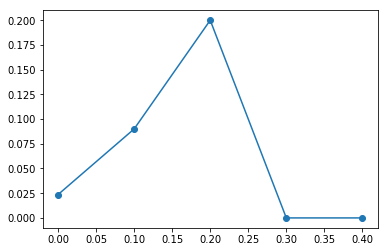

In [45]:
plt.plot(stat['r1'], stat[celvaltozo], marker='o')

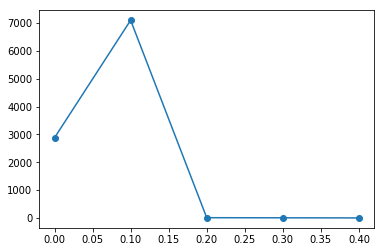

In [46]:
plt.plot(stat2['r1'], stat2[celvaltozo], marker='o')

In [47]:
from sklearn.metrics import roc_auc_score

In [49]:
roc_auc_score(test_df[celvaltozo], test_df['tipp'])
# a tipp nem jó ide, akkor rossz értéked lesz az értékkészlet miatt

0.5

In [50]:
roc_auc_score(test_df[celvaltozo], test_df['p1'])

0.678368468264555

In [51]:
from sklearn.metrics import roc_curve

In [52]:
a,b,c= roc_curve(test_df[celvaltozo], test_df['p1'])

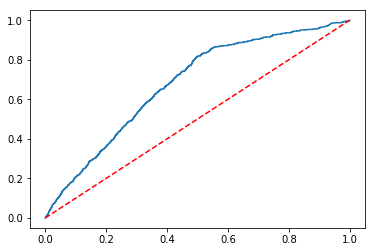

In [54]:
plt.plot(a,b)
plt.plot([0,1], [0,1], 'r--')

In [58]:
bekuldo_df=alldf[alldf['Train_Test']=="Test"].copy()

In [61]:
bekuldo_df['p0']=0
bekuldo_df['p1']=1
bekuldo_df.head()

,AffScore,Attr0,Attr1,Attr10,Attr100,Attr101,Attr102,Attr103,Attr104,Attr105,...,Attr95,Attr96,Attr97,Attr98,Attr99,ID,Target,Train_Test,p0,p1
0,NaN,11.487179,0.004029,16.071685,24.0,6740.44,NaN,NaN,NaN,NaN,...,5.086079,193779.51567,32.00000,6.683761,284824.232416,18860,NaN,Test,0,1
1,NaN,11.487179,0.004029,16.071685,136.0,31588.00,NaN,NaN,NaN,NaN,...,5.086079,193779.51567,32.00000,6.683761,284824.232416,14595,NaN,Test,0,1
2,NaN,11.487179,0.004029,16.071685,0.0,0.00,NaN,NaN,NaN,NaN,...,5.086079,193779.51567,60.88866,6.683761,284824.232416,16065,NaN,Test,0,1
3,NaN,11.487179,0.004029,16.071685,312.0,-98970.00,NaN,NaN,NaN,NaN,...,5.086079,193779.51567,144.00000,6.683761,284824.232416,38582,NaN,Test,0,1
4,NaN,11.487179,0.004029,16.071685,64.0,138989.20,NaN,NaN,NaN,NaN,...,5.086079,193779.51567,32.00000,6.683761,284824.232416,39690,NaN,Test,0,1


In [64]:
bekuldo_df[['p0','p1']]=model.predict_proba(bekuldo_df[bemeno_valtozok])
bekuldo_df.head()

,AffScore,Attr0,Attr1,Attr10,Attr100,Attr101,Attr102,Attr103,Attr104,Attr105,...,Attr95,Attr96,Attr97,Attr98,Attr99,ID,Target,Train_Test,p0,p1
0,NaN,11.487179,0.004029,16.071685,24.0,6740.44,NaN,NaN,NaN,NaN,...,5.086079,193779.51567,32.00000,6.683761,284824.232416,18860,NaN,Test,0.954731,0.045269
1,NaN,11.487179,0.004029,16.071685,136.0,31588.00,NaN,NaN,NaN,NaN,...,5.086079,193779.51567,32.00000,6.683761,284824.232416,14595,NaN,Test,0.938334,0.061666
2,NaN,11.487179,0.004029,16.071685,0.0,0.00,NaN,NaN,NaN,NaN,...,5.086079,193779.51567,60.88866,6.683761,284824.232416,16065,NaN,Test,0.942190,0.057810
3,NaN,11.487179,0.004029,16.071685,312.0,-98970.00,NaN,NaN,NaN,NaN,...,5.086079,193779.51567,144.00000,6.683761,284824.232416,38582,NaN,Test,0.945959,0.054041
4,NaN,11.487179,0.004029,16.071685,64.0,138989.20,NaN,NaN,NaN,NaN,...,5.086079,193779.51567,32.00000,6.683761,284824.232416,39690,NaN,Test,0.942478,0.057522


In [65]:
xdf=bekuldo_df[['ID','p1']]
xdf.columns=['ID','Target']
xdf.to_csv("szdori.csv", sep=',', index=False)
#ki kell írni csv-re